<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/main/Road2_AI_Course_lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

good morning. please prepare to write a program using python with keras, but don't write anything yet

first, please import a tenzor flow datasaet, specifically the fashion mnist dataset as supervised with info

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print information about the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


now, please print in a square grid the size of 5 by 5 the pictures contained in 25 random examples from the entire dataset

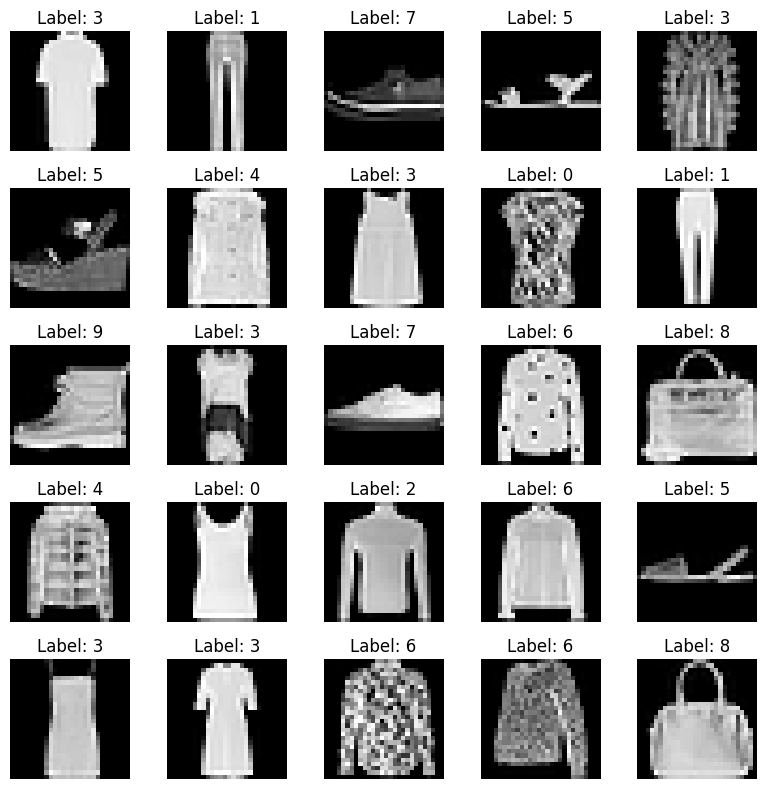

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the grid
grid_size = 5

# Select 25 random indices from the dataset
random_indices = np.random.choice(len(x_train), size=grid_size**2, replace=False)

# Create a square grid for displaying images
fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 8))

# Iterate through the grid and display images
for i, ax in enumerate(axes.flat):
    # Get the image and label at the random index
    image = x_train[random_indices[i]]
    label = y_train[random_indices[i]]

    # Display the image
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {label}")

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


very good. please show a statistical analysis by the class of each item of the training portion of the dataset, and then the same statistical analysis for the testing portion of the dataset

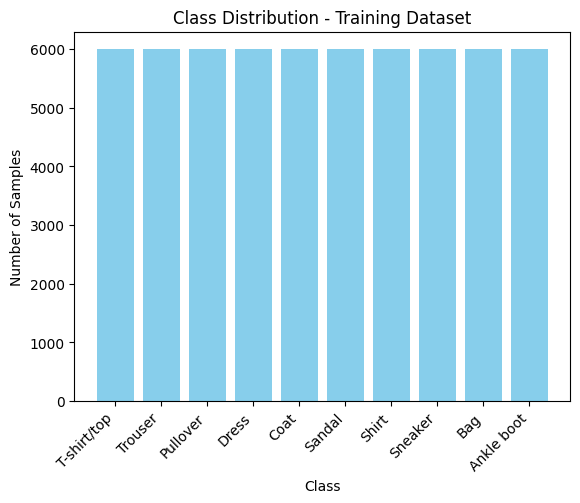

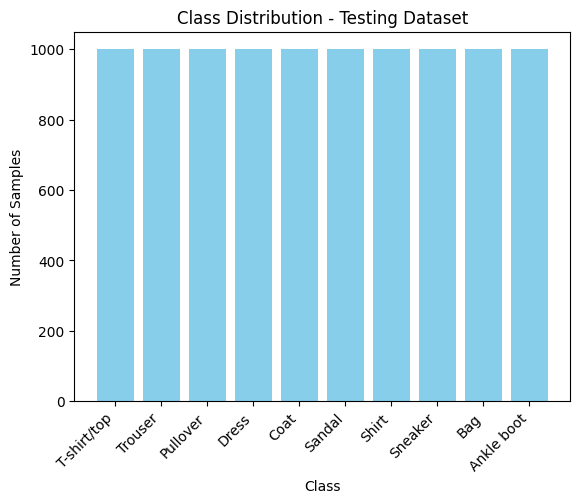

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names for Fashion MNIST dataset
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Function to plot a bar chart of class distribution
def plot_class_distribution(y, dataset_name):
    unique_classes, class_counts = np.unique(y, return_counts=True)

    plt.bar(unique_classes, class_counts, tick_label=class_names, color='skyblue')
    plt.title(f"Class Distribution - {dataset_name} Dataset")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot class distribution for the training dataset
plot_class_distribution(y_train, "Training")

# Plot class distribution for the testing dataset
plot_class_distribution(y_test, "Testing")


question to self: is the dataset balanced?
answer: yes. the training portion of the dataset contains 6000 items of each class in equal amounts. similiarly, the testing portion contains 1000 items of each class in equal amounts.

please create a neural network using keras. the network's input is a picture from the dataset, and its output is the type of item's name, converted from its class accordint to the info within the dataset. the first layer should flatten the image into a vector and normalize the value of each pixel into the range 0-1 by dividing its value by 255, using the function map for best efficiancy. lastly, the neural network should use the ReLU function and then the softmax function in order to pick the most probable type of item as the output, after its converted to the item's type name according to the info in the dataset. please print the neural network's architecture

In [ ]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to the range 0-1
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

# Build the neural network model
model = models.Sequential()

# Flatten the image into a vector and normalize pixel values
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Lambda(lambda x: x / 255.0))

# Add a dense layer with ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add the output layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 lambda (Lambda)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


fantastic. please train the network, using adam's optimizer, over 30 epochs of the entire training portion of the dataset, which contains 60000 examples, each divided into 50 batches

In [ ]:
# Train the model
history = model.fit(x_train_normalized, y_train, epochs=30, batch_size=50, validation_split=0.2)


Epoch 1/30
960/960 [==============================] - 4s 4ms/step - loss: 0.3286 - accuracy: 0.8833 - val_loss: 0.3523 - val_accuracy: 0.8732
Epoch 2/30
960/960 [==============================] - 5s 5ms/step - loss: 0.3270 - accuracy: 0.8834 - val_loss: 0.3527 - val_accuracy: 0.8739
Epoch 3/30
960/960 [==============================] - 4s 4ms/step - loss: 0.3256 - accuracy: 0.8839 - val_loss: 0.3506 - val_accuracy: 0.8744
Epoch 4/30
960/960 [==============================] - 4s 4ms/step - loss: 0.3245 - accuracy: 0.8844 - val_loss: 0.3510 - val_accuracy: 0.8752
Epoch 5/30
960/960 [==============================] - 5s 5ms/step - loss: 0.3236 - accuracy: 0.8848 - val_loss: 0.3500 - val_accuracy: 0.8748
Epoch 6/30
960/960 [==============================] - 4s 4ms/step - loss: 0.3218 - accuracy: 0.8851 - val_loss: 0.3578 - val_accuracy: 0.8703
Epoch 7/30
960/960 [==============================] - 4s 4ms/step - loss: 0.3209 - accuracy: 0.8857 - val_loss: 0.3494 - val_accuracy: 0.8758
Epoch 

very well done. now please test the network using 10 of the examples in the testing portion of the dataset, and print its prediction for each test next to the correct answer according to the dataset's info for comparison

In [ ]:
# Use the trained model to make predictions on the test data
predictions = model.predict(x_test_normalized[:10])

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the predictions alongside the correct answers
for i in range(10):
    print(f"Example {i + 1}:")
    print(f"Predicted: {class_names[predicted_labels[i]]}")
    print(f"Correct: {class_names[y_test[i]]}\n")


1/1 [==============================] - 0s 82ms/step
Example 1:
Predicted: Ankle boot
Correct: Ankle boot

Example 2:
Predicted: Pullover
Correct: Pullover

Example 3:
Predicted: Trouser
Correct: Trouser

Example 4:
Predicted: Trouser
Correct: Trouser

Example 5:
Predicted: Shirt
Correct: Shirt

Example 6:
Predicted: Trouser
Correct: Trouser

Example 7:
Predicted: Coat
Correct: Coat

Example 8:
Predicted: Shirt
Correct: Shirt

Example 9:
Predicted: Sandal
Correct: Sandal

Example 10:
Predicted: Sneaker
Correct: Sneaker




lastly, plasse run a test of the network using the entire testing portion of the dataset containing 10000 examples, then print a cross enthropy error function using adam's optimizer, and print a confusing matrix of the network's accuracy

Test Loss: 0.3702
Test Accuracy: 86.93%
313/313 [==============================] - 1s 4ms/step


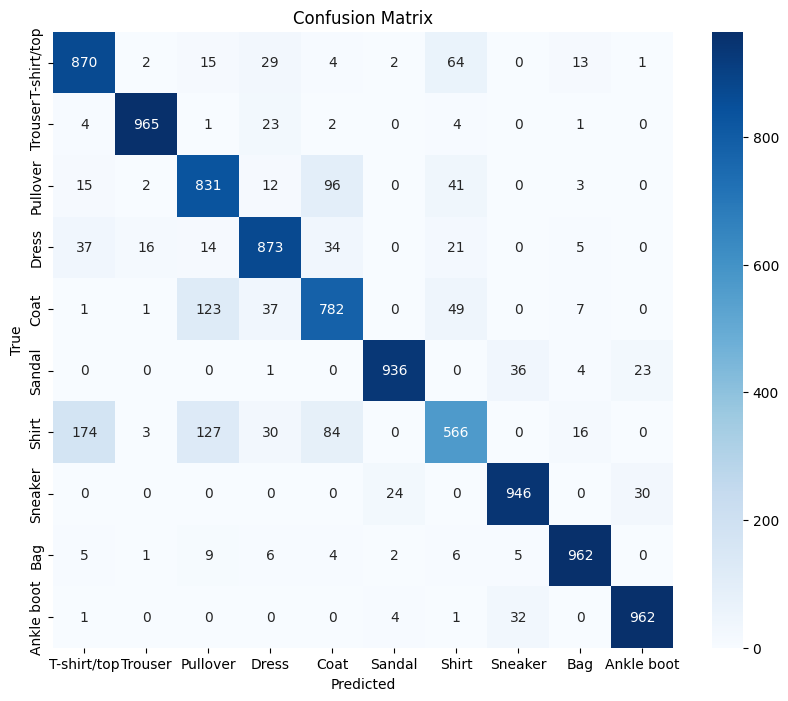

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test, verbose=0)

# Print the cross-entropy loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the entire testing dataset
test_predictions = model.predict(x_test_normalized)

# Convert predictions to class labels
predicted_labels_test = np.argmax(test_predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels_test)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
